In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def gather_record(key=''):
    filenames = os.listdir()
    record = []
    for fn in filenames:
        if '.csv' in fn and key in fn:
            record.append(np.loadtxt(fn,delimiter=','))
    record = np.concatenate(record,axis=0)
    return record
record = gather_record('2018-12-19')
print(record.shape)
print(record[np.argmax(record[:,-1])])

ValueError: need at least one array to concatenate

In [7]:
index2name = ['lr','norm_flag','gamma','lam','max_type','optim_type']
name2index = {n:i for i,n in enumerate(index2name)}
print(index2name)
print(name2index)

['lr', 'norm_flag', 'gamma', 'lam', 'max_type', 'optim_type']
{'lr': 0, 'norm_flag': 1, 'gamma': 2, 'lam': 3, 'max_type': 4, 'optim_type': 5}


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6b11fb36d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6b11fb3d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6b11fb3588>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6b11fbc438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6b11fbc780>,
 'means': []}

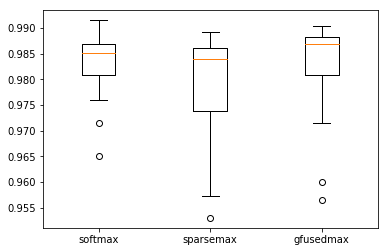

In [19]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#box plot
index = name2index['max_type']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['softmax','sparsemax','gfusedmax'])

(38, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6b11fc1978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6b11fcb048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6b11fc1828>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6b11fcb6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6b11fcba20>,
 'means': []}

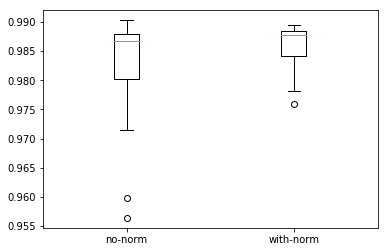

In [18]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
print(frecord.shape)
#box plot
index = name2index['norm_flag']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['no-norm','with-norm'])

(17, 7)


Text(0.5, 0, '$\\lambda$')

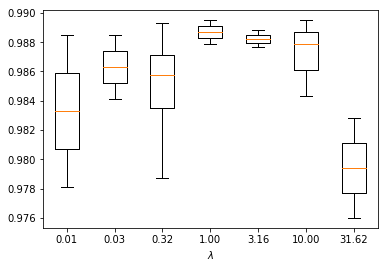

In [20]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
#filtered out non layer-norm
frecord = frecord[frecord[:,name2index['norm_flag']]==1]
print(frecord.shape)
#box plot
index = name2index['lam']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['%.2f'%v for v in values])
plt.xlabel('$\lambda$')

(17, 7) [ 0.01    1.     10.      1.      2.      0.      0.9895]


Text(0.5, 0, '$\\gamma$')

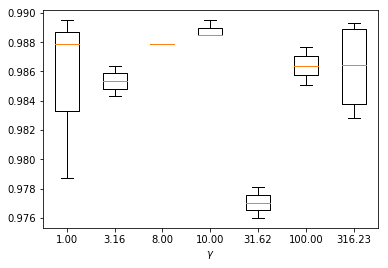

In [22]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
#filtered out non layer-norm
frecord = frecord[frecord[:,name2index['norm_flag']]==1]
print(frecord.shape,frecord[np.argmax(frecord[:,-1])])
#box plot
index = name2index['gamma']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['%.2f'%v for v in values])
plt.xlabel('$\gamma$')

(17, 7) [ 0.01    1.     10.      1.      2.      0.      0.9895]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6b11a7a860>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6b11a7aef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6b11a7a710>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6b11a025c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6b11a02908>,
 'means': []}

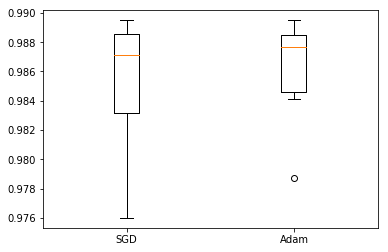

In [23]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
#filtered out non layer-norm
frecord = frecord[frecord[:,name2index['norm_flag']]==1]
print(frecord.shape,frecord[np.argmax(frecord[:,-1])])
#box plot
index = name2index['optim_type']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['SGD','Adam'])